# Deep Learning Trader

The data was downloaded from kibot.com

In [11]:
import pandas as pd
import numpy as np

df = pd.read_table('IBM_unadjusted.txt', header=None, sep=',', nrows=3000000)
df.columns = ['Date','Time','Open','High','Low','Close','Volume']

df['Date'] =  pd.to_datetime(df['Date'],infer_datetime_format=True)
#df.sort_values(by=['Date', 'Time'], inplace=True)
df = df.sort_values(['Date','Time']).reset_index(drop=True)

### 1. Data cleaning and processing
We need to create a column showing the 1-minute returns on the data set.



In [12]:
# Loop through all dates and create a return column
df['Return'] = df.groupby('Date')['Close'].pct_change()
df['Return'].fillna(0, inplace=True)
display(df.head())
display(df.tail())

,Date,Time,Open,High,Low,Close,Volume,Return
0,1998-01-02,09:30,104.5000,104.5,104.500,104.500,67000,0.000000
1,1998-01-02,09:31,104.3750,104.5,104.375,104.375,10800,-0.001196
2,1998-01-02,09:32,104.4375,104.5,104.375,104.500,13300,0.001198
3,1998-01-02,09:33,104.4375,104.5,104.375,104.375,16800,-0.001196
4,1998-01-02,09:34,104.3750,104.5,104.375,104.375,4801,0.000000


,Date,Time,Open,High,Low,Close,Volume,Return
2112952,2018-04-27,08:34,146.52,146.52,146.5,146.50,275,0.000341
2112953,2018-04-27,08:41,146.52,146.52,146.5,146.50,200,0.000000
2112954,2018-04-27,08:51,146.60,146.60,146.6,146.60,150,0.000683
2112955,2018-04-27,09:03,146.60,146.60,146.6,146.60,150,0.000000
2112956,2018-04-27,09:16,146.70,146.89,146.7,146.88,1101,0.001910


### 2. Data Plots of completeness and Returns

The shape of the data is:  (2112957, 8)


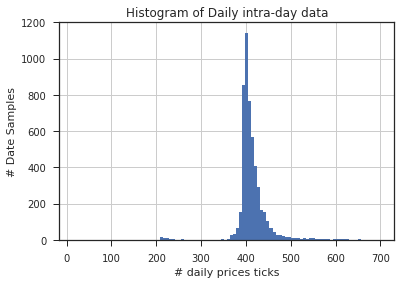

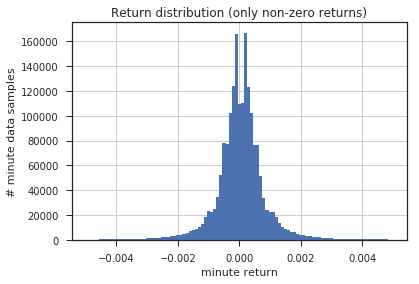

,Open,High,Low,Close,Volume,Return
count,2.112957e+06,2.112957e+06,2.112957e+06,2.112957e+06,2.112957e+06,2.112957e+06
mean,1.296299e+02,1.296780e+02,1.295816e+02,1.296298e+02,1.430454e+04,9.504512e-07
std,3.939766e+01,3.940117e+01,3.939381e+01,3.939729e+01,3.632126e+04,1.058394e-03
min,5.408000e+01,5.410000e+01,5.401000e+01,5.408000e+01,1.000000e+01,-8.256881e-02
25%,9.441000e+01,9.445000e+01,9.437000e+01,9.441000e+01,4.028000e+03,-3.030609e-04
50%,1.221800e+02,1.222393e+02,1.221200e+02,1.221800e+02,8.309000e+03,0.000000e+00
75%,1.621299e+02,1.621700e+02,1.620900e+02,1.621250e+02,1.630000e+04,2.987393e-04
max,2.460000e+02,2.460000e+02,2.460000e+02,2.460000e+02,1.212450e+07,9.487382e-02


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

print("The shape of the data is: ", df.shape)

# histogram of daily data
df['Date'].value_counts().hist(bins=100)
plt.xlabel('# daily prices ticks')
plt.ylabel('# Date Samples')
plt.title('Histogram of Daily intra-day data')
plt.grid(True)
plt.show()

# bar plot of minute returns data
# You can set arbitrary bin edges:
bins = np.arange(-0.005, 0.005, 0.0001)
hist, bin_edges = np.histogram(df[df['Return']!=0]['Return'], bins=bins)
plt.bar(bin_edges[1:],hist, width=0.0001)
plt.xlabel('minute return')
plt.ylabel('# minute data samples')
plt.title('Return distribution (only non-zero returns)')
plt.grid(True)
plt.show()

# Simple describe
display(df.describe())

#df_one_day = df[(df['Date'] >= '1999-01-04') & (df['Date'] <= '1999-01-04')].copy()
#df_one_day.plot(x='Time', y='Close') 
#df_one_day[['Time','Close']].plot()
#plt.show()
#display(df_one_day[['Time','Close']])


In [ ]:
# Importing the Keras libraries and packages
import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

display(df.describe())

# Loop through all dates and create
for date in df['Date'].unique():
    print(date)
    
     
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [ ]:
import pyfolio as pf
%matplotlib inline

# silence warnings
import warnings
warnings.filterwarnings('ignore')
stock_rets = pf.utils.get_symbol_rets('AMBC')
pf.create_returns_tear_sheet(stock_rets, live_start_date='2015-12-1')